In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sklearn as skl
import scipy
from scipy.stats import norm
from math import sqrt
%matplotlib inline


In [2]:
file=pd.read_csv(r'acs2015_census_tract_data.csv')

In [3]:
df=pd.DataFrame(file)

In [4]:
df.head(100)


,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1015001800,Alabama,Calhoun,6488,2851,3637,4.0,79.7,10.3,0.3,...,0.5,1.6,2.5,26.0,2527,71.6,24.4,4.0,0.0,10.5
96,1015002000,Alabama,Calhoun,7063,3429,3634,4.0,92.7,1.8,0.5,...,0.6,2.0,1.2,25.4,2902,75.6,18.0,5.8,0.5,5.8
97,1015002101,Alabama,Calhoun,3778,1997,1781,0.9,59.5,37.2,0.0,...,7.5,1.6,8.8,20.4,1767,78.7,17.4,3.9,0.0,15.2
98,1015002102,Alabama,Calhoun,3315,1590,1725,3.3,86.8,6.9,0.0,...,1.9,0.7,4.5,20.2,1335,71.8,23.7,4.6,0.0,12.3


In [5]:
print("Total number of missing values:")
pd.isnull(df).sum().sum()

Total number of missing values:


23569

In [6]:
print("Total number of Rows and Columns:")
df.shape

Total number of Rows and Columns:


(74001, 37)

In [7]:
df.describe()

,CensusTract,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,7.400100e+04,74001.000000,74001.000000,74001.000000,73311.000000,73311.000000,73311.000000,73311.000000,73311.000000,73311.000000,...,73204.000000,73204.000000,73204.000000,73052.000000,74001.000000,73194.000000,73194.000000,73194.000000,73194.000000,73199.000000
mean,2.839113e+10,4325.591465,2127.648816,2197.942649,16.862810,62.032106,13.272581,0.727726,4.588253,0.145012,...,3.123340,1.891606,4.368093,25.667357,1983.907366,78.975238,14.621566,6.233814,0.169772,9.028663
std,1.647593e+10,2129.306903,1072.332031,1095.730931,22.940695,30.684152,21.762483,4.488340,8.794003,1.037354,...,5.881237,2.596198,3.904990,6.964881,1073.429808,8.345758,7.535786,4.042990,0.458227,5.955441
min,1.001020e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.303901e+10,2891.000000,1409.000000,1461.000000,2.400000,39.400000,0.700000,0.000000,0.200000,0.000000,...,0.400000,0.400000,1.800000,20.800000,1249.000000,74.600000,9.600000,3.500000,0.000000,5.100000
50%,2.804700e+10,4063.000000,1986.000000,2066.000000,7.000000,71.400000,3.700000,0.000000,1.400000,0.000000,...,1.400000,1.100000,3.500000,25.000000,1846.000000,80.100000,13.400000,5.500000,0.000000,7.700000
75%,4.200341e+10,5442.000000,2674.000000,2774.000000,20.400000,88.300000,14.400000,0.400000,4.800000,0.000000,...,3.500000,2.500000,5.900000,29.800000,2553.000000,84.600000,18.200000,8.100000,0.000000,11.400000
max,7.215375e+10,53812.000000,27962.000000,27250.000000,100.000000,100.000000,100.000000,100.000000,91.300000,84.700000,...,100.000000,100.000000,100.000000,80.000000,24075.000000,100.000000,100.000000,100.000000,26.500000,100.000000


## Data Description

In [8]:
print("Dataset has", len(df['State'].unique()), 'states from the USA.')
print('Dataset has', len(df['County'].unique()),'counties.')
print('This Dataset is based on the census of the year 2015.')

Dataset has 52 states from the USA.
Dataset has 1928 counties.
This Dataset is based on the census of the year 2015.


In [9]:
test=pd.isnull(df)


In [10]:
test

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73999,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.fillna(value='NaN',inplace=True)

In [12]:
df.isna()

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73999,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
test=pd.DataFrame(file)

In [14]:
print("total number of missing values:")
pd.isnull(test).sum().sum()

total number of missing values:


23569

In [15]:
print("MISSING VALUES FOUND:")
pd.isna(test).sum()

MISSING VALUES FOUND:


CensusTract           0
State                 0
County                0
TotalPop              0
Men                   0
Women                 0
Hispanic            690
White               690
Black               690
Native              690
Asian               690
Pacific             690
Citizen               0
Income             1100
IncomeErr          1100
IncomePerCap        740
IncomePerCapErr     740
Poverty             835
ChildPoverty       1118
Professional        807
Service             807
Office              807
Construction        807
Production          807
Drive               797
Carpool             797
Transit             797
Walk                797
OtherTransp         797
WorkAtHome          797
MeanCommute         949
Employed              0
PrivateWork         807
PublicWork          807
SelfEmployed        807
FamilyWork          807
Unemployment        802
dtype: int64

Text(0.5, 1.0, 'Heatmap showing missing values-before cleaning')

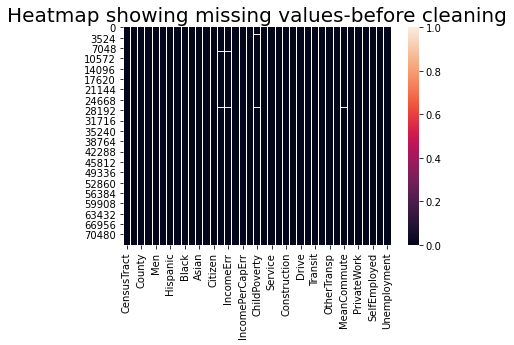

In [16]:
sns.heatmap(test.isnull())
plt.title('Heatmap showing missing values-before cleaning', fontsize = 20)

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusTract      74001 non-null  int64  
 1   State            74001 non-null  object 
 2   County           74001 non-null  object 
 3   TotalPop         74001 non-null  int64  
 4   Men              74001 non-null  int64  
 5   Women            74001 non-null  int64  
 6   Hispanic         73311 non-null  float64
 7   White            73311 non-null  float64
 8   Black            73311 non-null  float64
 9   Native           73311 non-null  float64
 10  Asian            73311 non-null  float64
 11  Pacific          73311 non-null  float64
 12  Citizen          74001 non-null  int64  
 13  Income           72901 non-null  float64
 14  IncomeErr        72901 non-null  float64
 15  IncomePerCap     73261 non-null  float64
 16  IncomePerCapErr  73261 non-null  float64
 17  Poverty     

## Data Cleaning

In [18]:
test.drop(['CensusTract','Drive','Carpool','Transit','Walk','OtherTransp','WorkAtHome','MeanCommute'], axis='columns', inplace=True)

In [19]:
temp=test.groupby("County").sum()

In [20]:
test1=test.dropna() #dropping of missing values.

In [21]:
test1

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Service,Office,Construction,Production,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,0.6,...,17.0,21.3,11.9,15.2,943,77.1,18.3,4.6,0.0,5.4
1,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,2.3,...,24.7,21.5,9.4,22.0,753,77.0,16.9,6.1,0.0,13.3
2,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,1.4,...,24.9,22.1,9.2,12.4,1373,64.1,23.6,12.3,0.0,6.2
3,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,0.0,...,20.8,27.0,8.7,16.4,1782,75.7,21.2,3.1,0.0,10.8
4,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,3.8,...,14.2,18.2,2.1,15.8,5037,67.1,27.6,5.3,0.0,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,Puerto Rico,Yauco,6205,3291,2914,99.7,0.3,0.0,0.0,0.0,...,19.2,26.8,11.1,10.1,1659,64.7,31.3,3.9,0.0,21.3
73997,Puerto Rico,Yauco,2122,921,1201,99.2,0.3,0.0,0.0,0.5,...,13.0,20.9,20.5,9.1,484,64.0,32.6,3.3,0.0,22.4
73998,Puerto Rico,Yauco,2277,1097,1180,99.5,0.4,0.0,0.0,0.2,...,32.6,29.7,3.1,13.6,582,58.2,32.3,9.5,0.0,23.3
73999,Puerto Rico,Yauco,5267,2663,2604,98.8,1.2,0.0,0.0,0.0,...,18.6,23.9,10.2,10.7,1369,67.5,31.2,1.3,0.0,26.7


In [22]:
print("total number of missing values:")
pd.isnull(test1).sum().sum()

total number of missing values:


0

In [23]:
print("total number of missing values:")
pd.isnull(test1).sum()

total number of missing values:


State              0
County             0
TotalPop           0
Men                0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Pacific            0
Citizen            0
Income             0
IncomeErr          0
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       0
Professional       0
Service            0
Office             0
Construction       0
Production         0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
Unemployment       0
dtype: int64

Text(0.5, 1.0, 'Heatmap showing missing values- After cleaning')

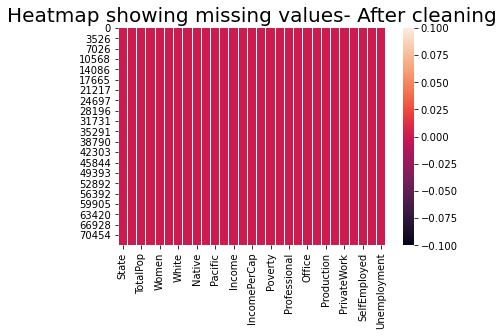

In [24]:
sns.heatmap(test1.isnull())
plt.title('Heatmap showing missing values- After cleaning', fontsize = 20)

## Correlation 

In [25]:
test.corr()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,...,Service,Office,Construction,Production,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
TotalPop,1.000000,0.981730,0.982509,0.107768,-0.027142,-0.110497,-0.036417,0.101280,0.022152,0.936741,...,-0.107840,0.062372,-0.011855,-0.071495,0.923397,0.043101,-0.003133,-0.079666,-0.030709,-0.126168
Men,0.981730,1.000000,0.929127,0.115913,-0.018959,-0.131607,-0.031199,0.099412,0.026390,0.920412,...,-0.108743,0.034555,0.023100,-0.057207,0.894436,0.032733,0.001430,-0.067432,-0.024856,-0.134165
Women,0.982509,0.929127,1.000000,0.095830,-0.034156,-0.085767,-0.040186,0.099386,0.017188,0.919589,...,-0.103302,0.087494,-0.045676,-0.083061,0.919080,0.051792,-0.007495,-0.088945,-0.035399,-0.114064
Hispanic,0.107768,0.115913,0.095830,1.000000,-0.658996,-0.116299,-0.039505,0.030319,0.018983,-0.105089,...,0.283783,0.005574,0.266466,0.130704,0.017832,0.055134,-0.091866,0.060532,-0.026690,0.221526
White,-0.027142,-0.018959,-0.034156,-0.658996,1.000000,-0.582652,-0.074963,-0.251567,-0.094860,0.167777,...,-0.466326,-0.026948,-0.041824,-0.125901,0.074169,-0.036922,-0.029359,0.123512,0.064617,-0.484947
Black,-0.110497,-0.131607,-0.085767,-0.116299,-0.582652,1.000000,-0.052171,-0.108434,-0.037542,-0.131303,...,0.371078,0.053961,-0.128443,0.139671,-0.178416,0.018695,0.103516,-0.225099,-0.056274,0.472147
Native,-0.036417,-0.031199,-0.040186,-0.039505,-0.074963,-0.052171,1.000000,-0.041618,0.008636,-0.035695,...,0.050832,-0.043661,0.073045,0.006229,-0.066248,-0.218563,0.235699,0.008925,0.025761,0.093158
Asian,0.101280,0.099412,0.099386,0.030319,-0.251567,-0.108434,-0.041618,1.000000,0.163122,0.029224,...,-0.078288,-0.035175,-0.237032,-0.220274,0.159457,0.067076,-0.060708,-0.022708,-0.023090,-0.104318
Pacific,0.022152,0.026390,0.017188,0.018983,-0.094860,-0.037542,0.008636,0.163122,1.000000,0.002708,...,0.053359,0.017130,0.008374,-0.010234,0.014362,-0.030675,0.037186,-0.005864,-0.001060,0.003430
Citizen,0.936741,0.920412,0.919589,-0.105089,0.167777,-0.131303,-0.035695,0.029224,0.002708,1.000000,...,-0.192873,0.100834,-0.100956,-0.134470,0.879336,-0.027873,0.071689,-0.073784,-0.020716,-0.175364


In [26]:
#new dataframe with irrelavant columns dropped.
#column 
new=test[['State','County','TotalPop','Men','Women','White','Hispanic','Black','Asian','Pacific','Citizen','Income','IncomeErr','IncomePerCap','Poverty','ChildPoverty','Employed','Unemployment']]

In [27]:
new

,State,County,TotalPop,Men,Women,White,Hispanic,Black,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,Poverty,ChildPoverty,Employed,Unemployment
0,Alabama,Autauga,1948,940,1008,87.4,0.9,7.7,0.6,0.0,1503,61838.0,11900.0,25713.0,8.1,8.4,943,5.4
1,Alabama,Autauga,2156,1059,1097,40.4,0.8,53.3,2.3,0.0,1662,32303.0,13538.0,18021.0,25.5,40.3,753,13.3
2,Alabama,Autauga,2968,1364,1604,74.5,0.0,18.6,1.4,0.3,2335,44922.0,5629.0,20689.0,12.7,19.7,1373,6.2
3,Alabama,Autauga,4423,2172,2251,82.8,10.5,3.7,0.0,0.0,3306,54329.0,7003.0,24125.0,2.1,1.6,1782,10.8
4,Alabama,Autauga,10763,4922,5841,68.5,0.7,24.8,3.8,0.0,7666,51965.0,6935.0,27526.0,11.4,17.5,5037,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,Puerto Rico,Yauco,6205,3291,2914,0.3,99.7,0.0,0.0,0.0,4354,21188.0,3599.0,8474.0,40.7,59.9,1659,21.3
73997,Puerto Rico,Yauco,2122,921,1201,0.3,99.2,0.0,0.5,0.0,1466,25781.0,7874.0,10788.0,32.8,28.0,484,22.4
73998,Puerto Rico,Yauco,2277,1097,1180,0.4,99.5,0.0,0.2,0.0,1741,17284.0,3507.0,8524.0,56.6,83.5,582,23.3
73999,Puerto Rico,Yauco,5267,2663,2604,1.2,98.8,0.0,0.0,0.0,3938,22083.0,9813.0,9907.0,39.9,34.6,1369,26.7


In [28]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         74001 non-null  object 
 1   County        74001 non-null  object 
 2   TotalPop      74001 non-null  int64  
 3   Men           74001 non-null  int64  
 4   Women         74001 non-null  int64  
 5   White         73311 non-null  float64
 6   Hispanic      73311 non-null  float64
 7   Black         73311 non-null  float64
 8   Asian         73311 non-null  float64
 9   Pacific       73311 non-null  float64
 10  Citizen       74001 non-null  int64  
 11  Income        72901 non-null  float64
 12  IncomeErr     72901 non-null  float64
 13  IncomePerCap  73261 non-null  float64
 14  Poverty       73166 non-null  float64
 15  ChildPoverty  72883 non-null  float64
 16  Employed      74001 non-null  int64  
 17  Unemployment  73199 non-null  float64
dtypes: float64(11), int64(5), 

## Data Visualization 

In [29]:
new=new.assign(PoC=lambda x:(x['Hispanic']+x['Black']+x['Asian']+x['Pacific'])) #PoC-People of Colour

In [30]:
new

,State,County,TotalPop,Men,Women,White,Hispanic,Black,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,Poverty,ChildPoverty,Employed,Unemployment,PoC
0,Alabama,Autauga,1948,940,1008,87.4,0.9,7.7,0.6,0.0,1503,61838.0,11900.0,25713.0,8.1,8.4,943,5.4,9.2
1,Alabama,Autauga,2156,1059,1097,40.4,0.8,53.3,2.3,0.0,1662,32303.0,13538.0,18021.0,25.5,40.3,753,13.3,56.4
2,Alabama,Autauga,2968,1364,1604,74.5,0.0,18.6,1.4,0.3,2335,44922.0,5629.0,20689.0,12.7,19.7,1373,6.2,20.3
3,Alabama,Autauga,4423,2172,2251,82.8,10.5,3.7,0.0,0.0,3306,54329.0,7003.0,24125.0,2.1,1.6,1782,10.8,14.2
4,Alabama,Autauga,10763,4922,5841,68.5,0.7,24.8,3.8,0.0,7666,51965.0,6935.0,27526.0,11.4,17.5,5037,4.2,29.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,Puerto Rico,Yauco,6205,3291,2914,0.3,99.7,0.0,0.0,0.0,4354,21188.0,3599.0,8474.0,40.7,59.9,1659,21.3,99.7
73997,Puerto Rico,Yauco,2122,921,1201,0.3,99.2,0.0,0.5,0.0,1466,25781.0,7874.0,10788.0,32.8,28.0,484,22.4,99.7
73998,Puerto Rico,Yauco,2277,1097,1180,0.4,99.5,0.0,0.2,0.0,1741,17284.0,3507.0,8524.0,56.6,83.5,582,23.3,99.7
73999,Puerto Rico,Yauco,5267,2663,2604,1.2,98.8,0.0,0.0,0.0,3938,22083.0,9813.0,9907.0,39.9,34.6,1369,26.7,98.8


In [31]:
new.info() #with newly added PoC

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         74001 non-null  object 
 1   County        74001 non-null  object 
 2   TotalPop      74001 non-null  int64  
 3   Men           74001 non-null  int64  
 4   Women         74001 non-null  int64  
 5   White         73311 non-null  float64
 6   Hispanic      73311 non-null  float64
 7   Black         73311 non-null  float64
 8   Asian         73311 non-null  float64
 9   Pacific       73311 non-null  float64
 10  Citizen       74001 non-null  int64  
 11  Income        72901 non-null  float64
 12  IncomeErr     72901 non-null  float64
 13  IncomePerCap  73261 non-null  float64
 14  Poverty       73166 non-null  float64
 15  ChildPoverty  72883 non-null  float64
 16  Employed      74001 non-null  int64  
 17  Unemployment  73199 non-null  float64
 18  PoC           73311 non-nu

In [32]:
new['PoC'].mean()

34.86865681821282

In [33]:
new.PoC

0         9.2
1        56.4
2        20.3
3        14.2
4        29.3
         ... 
73996    99.7
73997    99.7
73998    99.7
73999    98.8
74000    99.3
Name: PoC, Length: 74001, dtype: float64

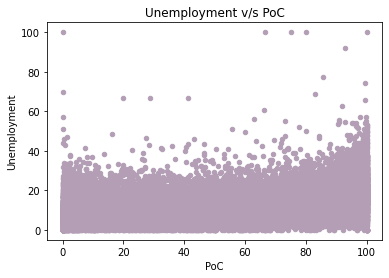

In [34]:
new.plot.scatter(x='PoC',y='Unemployment',c='#b39eb5',title="Unemployment v/s PoC")

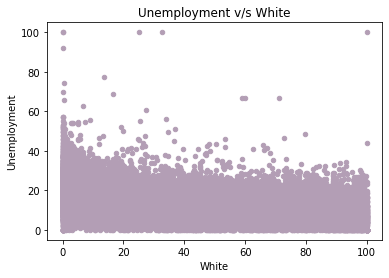

In [35]:
new.plot.scatter(x='White',y='Unemployment',c='#b39eb5',title="Unemployment v/s White")

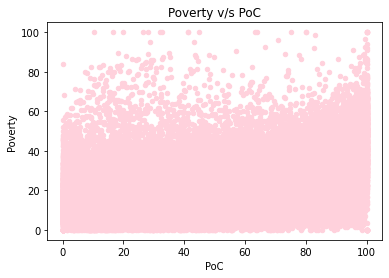

In [36]:
new.plot.scatter(x='PoC',y='Poverty',c='#ffd1dc',title="Poverty v/s PoC")

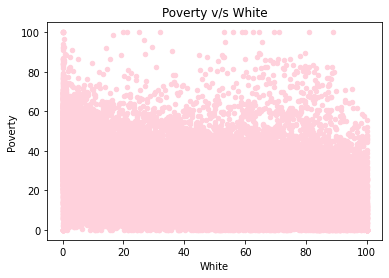

In [37]:
new.plot.scatter(x='White',y='Poverty',c='#ffd1dc',title='Poverty v/s White')

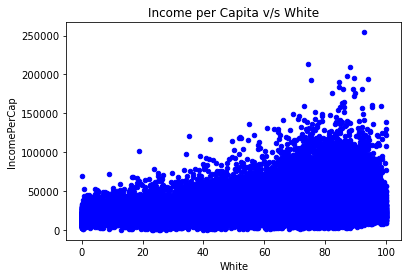

In [38]:
new.plot.scatter(x='White',y='IncomePerCap',c='blue',title='Income per Capita v/s White')

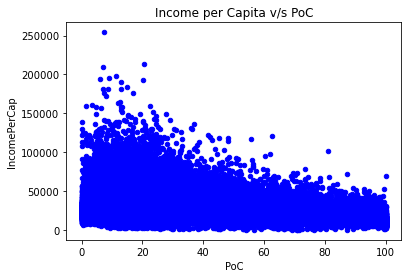

In [39]:
new.plot.scatter(x='PoC',y='IncomePerCap',c='blue',title='Income per Capita v/s PoC')

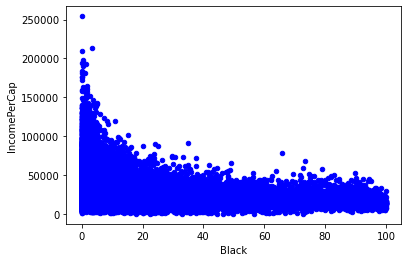

In [40]:
new.plot.scatter(x='Black',y='IncomePerCap',c='blue')

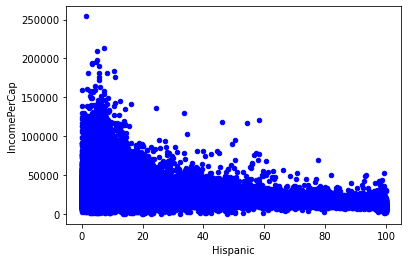

In [41]:
new.plot.scatter(x='Hispanic',y='IncomePerCap',c='blue')

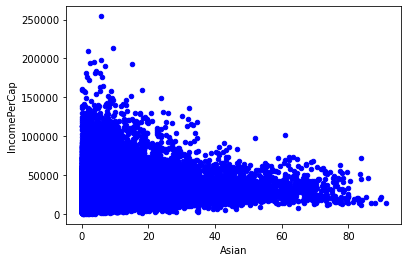

In [42]:
new.plot.scatter(x='Asian',y='IncomePerCap',c='blue')

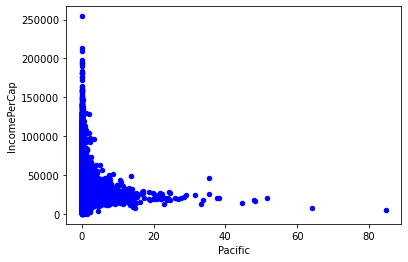

In [43]:
new.plot.scatter(x='Pacific',y='IncomePerCap',c='blue')

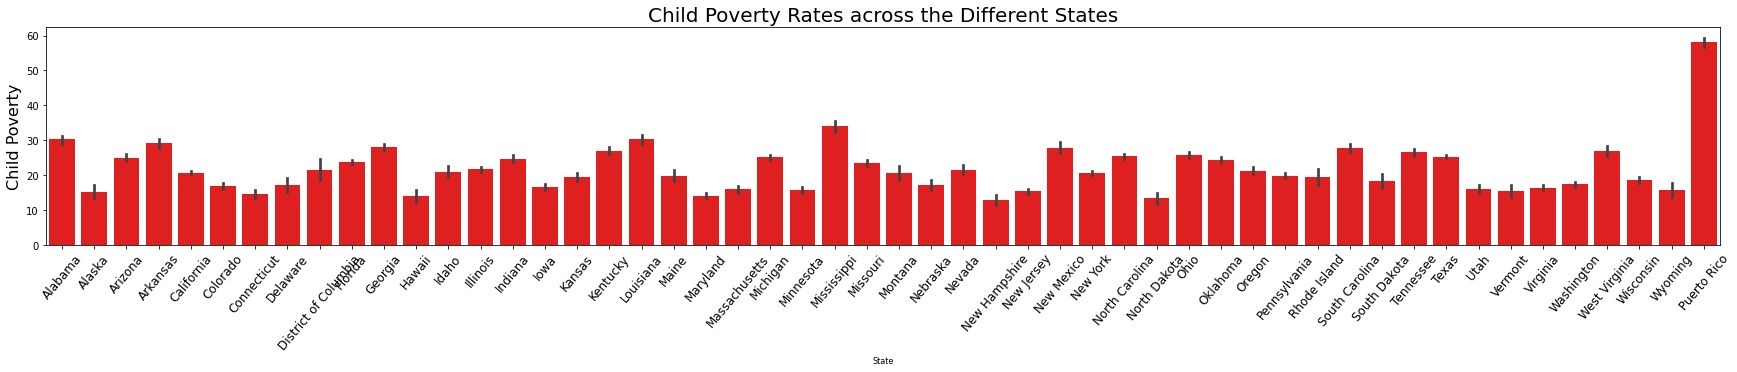

In [44]:
y=new["ChildPoverty"]
x =new["State"]
plt.figure(figsize=(30,4))
ax=sns.barplot(y = y, x = x,color='r')
plt.xlabel(xlabel='State', fontsize=8)
plt.xticks(fontsize=12, rotation=50)
plt.ylabel(ylabel='Child Poverty', fontsize=16)
plt.title(label='Child Poverty Rates across the Different States', fontsize=20)
plt.show()

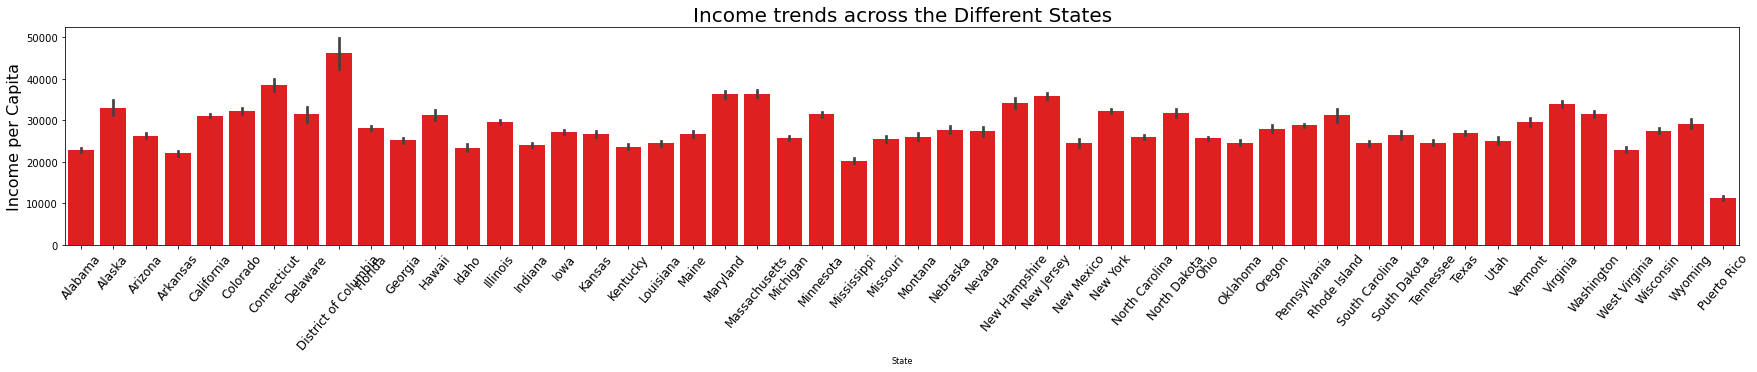

In [45]:
y=new["IncomePerCap"]
x =new["State"]
plt.figure(figsize=(30,4))
ax=sns.barplot(y = y, x = x,color='r')
plt.xlabel(xlabel='State', fontsize=8)
plt.xticks(fontsize=12, rotation=50)
plt.ylabel(ylabel='Income per Capita', fontsize=16)
plt.title(label='Income trends across the Different States', fontsize=20)
plt.show()

In [46]:
new=new.assign(men_to_women_ration=lambda x:(x['Men']/x['Women']))

In [47]:
new

,State,County,TotalPop,Men,Women,White,Hispanic,Black,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,Poverty,ChildPoverty,Employed,Unemployment,PoC,men_to_women_ration
0,Alabama,Autauga,1948,940,1008,87.4,0.9,7.7,0.6,0.0,1503,61838.0,11900.0,25713.0,8.1,8.4,943,5.4,9.2,0.932540
1,Alabama,Autauga,2156,1059,1097,40.4,0.8,53.3,2.3,0.0,1662,32303.0,13538.0,18021.0,25.5,40.3,753,13.3,56.4,0.965360
2,Alabama,Autauga,2968,1364,1604,74.5,0.0,18.6,1.4,0.3,2335,44922.0,5629.0,20689.0,12.7,19.7,1373,6.2,20.3,0.850374
3,Alabama,Autauga,4423,2172,2251,82.8,10.5,3.7,0.0,0.0,3306,54329.0,7003.0,24125.0,2.1,1.6,1782,10.8,14.2,0.964904
4,Alabama,Autauga,10763,4922,5841,68.5,0.7,24.8,3.8,0.0,7666,51965.0,6935.0,27526.0,11.4,17.5,5037,4.2,29.3,0.842664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,Puerto Rico,Yauco,6205,3291,2914,0.3,99.7,0.0,0.0,0.0,4354,21188.0,3599.0,8474.0,40.7,59.9,1659,21.3,99.7,1.129375
73997,Puerto Rico,Yauco,2122,921,1201,0.3,99.2,0.0,0.5,0.0,1466,25781.0,7874.0,10788.0,32.8,28.0,484,22.4,99.7,0.766861
73998,Puerto Rico,Yauco,2277,1097,1180,0.4,99.5,0.0,0.2,0.0,1741,17284.0,3507.0,8524.0,56.6,83.5,582,23.3,99.7,0.929661
73999,Puerto Rico,Yauco,5267,2663,2604,1.2,98.8,0.0,0.0,0.0,3938,22083.0,9813.0,9907.0,39.9,34.6,1369,26.7,98.8,1.022657


In [48]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                74001 non-null  object 
 1   County               74001 non-null  object 
 2   TotalPop             74001 non-null  int64  
 3   Men                  74001 non-null  int64  
 4   Women                74001 non-null  int64  
 5   White                73311 non-null  float64
 6   Hispanic             73311 non-null  float64
 7   Black                73311 non-null  float64
 8   Asian                73311 non-null  float64
 9   Pacific              73311 non-null  float64
 10  Citizen              74001 non-null  int64  
 11  Income               72901 non-null  float64
 12  IncomeErr            72901 non-null  float64
 13  IncomePerCap         73261 non-null  float64
 14  Poverty              73166 non-null  float64
 15  ChildPoverty         72883 non-null 

In [49]:
new.head()

,State,County,TotalPop,Men,Women,White,Hispanic,Black,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,Poverty,ChildPoverty,Employed,Unemployment,PoC,men_to_women_ration
0,Alabama,Autauga,1948,940,1008,87.4,0.9,7.7,0.6,0.0,1503,61838.0,11900.0,25713.0,8.1,8.4,943,5.4,9.2,0.932540
1,Alabama,Autauga,2156,1059,1097,40.4,0.8,53.3,2.3,0.0,1662,32303.0,13538.0,18021.0,25.5,40.3,753,13.3,56.4,0.965360
2,Alabama,Autauga,2968,1364,1604,74.5,0.0,18.6,1.4,0.3,2335,44922.0,5629.0,20689.0,12.7,19.7,1373,6.2,20.3,0.850374
3,Alabama,Autauga,4423,2172,2251,82.8,10.5,3.7,0.0,0.0,3306,54329.0,7003.0,24125.0,2.1,1.6,1782,10.8,14.2,0.964904
4,Alabama,Autauga,10763,4922,5841,68.5,0.7,24.8,3.8,0.0,7666,51965.0,6935.0,27526.0,11.4,17.5,5037,4.2,29.3,0.842664


In [50]:
np.max(temp['Men'])

4945351

In [51]:
np.max(temp['Women'])

5093037

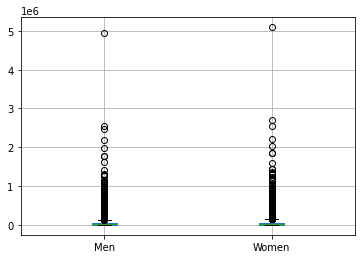

In [52]:
boxplot = temp.boxplot(column=['Men','Women'])

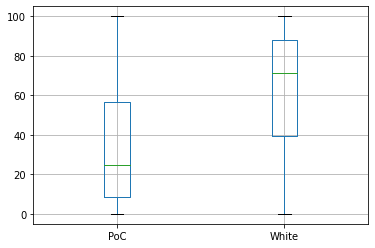

In [53]:
boxplot = new.boxplot(column=['PoC','White'])

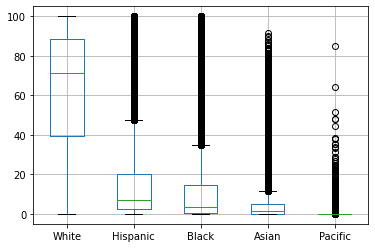

In [54]:
boxplot = new.boxplot(column=['White','Hispanic','Black','Asian','Pacific'])

## Normalization


In [55]:
from sklearn.preprocessing import normalize
df_numerical=test1.drop(test1.describe(include=['O']), axis=1)
df_numerical
dff=pd.read_csv(r'acs2015_census_tract_data.csv')

In [56]:
print("MEAN")
dff.mean()

MEAN


CensusTract        2.839113e+10
TotalPop           4.325591e+03
Men                2.127649e+03
Women              2.197943e+03
Hispanic           1.686281e+01
White              6.203211e+01
Black              1.327258e+01
Native             7.277257e-01
Asian              4.588253e+00
Pacific            1.450123e-01
Citizen            3.043080e+03
Income             5.722556e+04
IncomeErr          9.134494e+03
IncomePerCap       2.849123e+04
IncomePerCapErr    3.942909e+03
Poverty            1.695802e+01
ChildPoverty       2.248683e+01
Professional       3.479884e+01
Service            1.910138e+01
Office             2.395156e+01
Construction       9.292337e+00
Production         1.285600e+01
Drive              7.553389e+01
Carpool            9.627468e+00
Transit            5.456050e+00
Walk               3.123340e+00
OtherTransp        1.891606e+00
WorkAtHome         4.368093e+00
MeanCommute        2.566736e+01
Employed           1.983907e+03
PrivateWork        7.897524e+01
PublicWo

In [57]:
print("VARIANCE")
dff.var()

VARIANCE


CensusTract        2.714562e+20
TotalPop           4.533948e+06
Men                1.149896e+06
Women              1.200626e+06
Hispanic           5.262755e+02
White              9.415172e+02
Black              4.736057e+02
Native             2.014520e+01
Asian              7.733448e+01
Pacific            1.076103e+00
Citizen            2.177079e+06
Income             8.215866e+08
IncomeErr          3.505038e+07
IncomePerCap       2.264143e+08
IncomePerCapErr    9.138698e+06
Poverty            1.741481e+02
ChildPoverty       3.682910e+02
Professional       2.252123e+02
Service            6.854421e+01
Office             3.548917e+01
Construction       3.628002e+01
Production         5.885326e+01
Drive              2.362867e+02
Carpool            2.880814e+01
Transit            1.374589e+02
Walk               3.458895e+01
OtherTransp        6.740246e+00
WorkAtHome         1.524895e+01
MeanCommute        4.850956e+01
Employed           1.152252e+06
PrivateWork        6.965168e+01
PublicWo

In [58]:
#a=np.array([df_numerical['TotalPop'],df_numerical['Men'],df_numerical['Women'],df_numerical['Hispanic'],df_numerical['White'],df_numerical['Black'],df_numerical['Native'],df_numerical['Asian'],df_numerical['Pacific'],df_numerical['Citizen'],df_numerical['Income'],df_numerical['IncomeErr'],df_numerical['IncomePerCap'],df_numerical['IncomePerCapErr'],df_numerical['Poverty'],df_numerical['ChildPoverty'],df_numerical['Professional'],df_numerical['Service'],df_numerical['Office'],df_numerical['Construction'],df_numerical['Production'],df_numerical['Employed'],df_numerical['PrivateWork'],df_numerical['PublicWork'],df_numerical['SelfEmployed'],df_numerical['FamilyWork'],df_numerical['Unemployment']])
a=np.array([test1['TotalPop'],test1['Men'],test1['Women'],test1['Hispanic'],test1['White'],test1['Black'],test1['Native'],test1['Asian'],test1['Pacific'],test1['Citizen'],test1['Income'],test1['IncomeErr'],test1['IncomePerCap'],test1['IncomePerCapErr'],test1['Poverty'],test1['ChildPoverty'],test1['Professional'],test1['Service'],test1['Office'],test1['Construction'],test1['Production'],test1['Employed'],test1['PrivateWork'],test1['PublicWork'],test1['SelfEmployed'],test1['FamilyWork'],test1['Unemployment']])
norm_a=normalize(a)
print(norm_a)
test1=test1.drop(['TotalPop','Men','Women','Hispanic','White','Black','Native','Asian','Pacific','Citizen','Income','IncomeErr','IncomePerCap','IncomePerCapErr','Poverty','ChildPoverty','Professional','Service','Office','Construction','Production','Employed','PrivateWork','PublicWork','SelfEmployed','FamilyWork','Unemployment'],axis=1)
test1.insert(2,'TotalPop',norm_a[0])
test1.insert(3,'Men',norm_a[1])
test1.insert(4,'Women',norm_a[2])
test1.insert(5,'Hispanic',norm_a[3])
test1.insert(6,'White',norm_a[4])
test1.insert(7,'Black',norm_a[5])
test1.insert(8,'Native',norm_a[6])
test1.insert(9,'Asian',norm_a[7])
test1.insert(10,'Pacific',norm_a[8])
test1.insert(11,'Citizen',norm_a[9])
test1.insert(12,'Income',norm_a[10])
test1.insert(13,'IncomeErr',norm_a[11])
test1.insert(14,'IncomePerCap',norm_a[12])
test1.insert(15,'IncomePerCapErr',norm_a[13])
test1.insert(16,'Poverty',norm_a[14])
test1.insert(17,'ChildPoverty',norm_a[15])
test1.insert(18,'Professional',norm_a[16])
test1.insert(19,'Service',norm_a[17])
test1.insert(20,'Office',norm_a[18])
test1.insert(21,'Construction',norm_a[19])
test1.insert(22,'Production',norm_a[20])
test1.insert(23,'Employed',norm_a[21])
test1.insert(24,'PrivateWork',norm_a[22])
test1.insert(25,'PublicWork',norm_a[23])
test1.insert(26,'SelfEmployed',norm_a[24])
test1.insert(27,'FamilyWork',norm_a[25])
test1.insert(28,'Unemployment',norm_a[26])
test1

[[0.00148763 0.00164647 0.00226657 ... 0.00173887 0.00402224 0.00209321]
 [0.00145439 0.00163851 0.00211041 ... 0.0016973  0.00412025 0.00182727]
 [0.00151063 0.00164401 0.00240382 ... 0.00176839 0.00390246 0.00233788]
 ...
 [0.00233144 0.00309169 0.00623407 ... 0.00481493 0.00065889 0.00390263]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00186769 0.00460006 0.00214439 ... 0.00805876 0.00923471 0.00695197]]


,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Service,Office,Construction,Production,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Alabama,Autauga,0.001488,0.001454,0.001511,0.000117,0.004681,0.001121,0.000246,0.000224,...,0.003039,0.003210,0.003992,0.003771,0.001537,0.003599,0.004147,0.002331,0.0,0.001868
1,Alabama,Autauga,0.001646,0.001639,0.001644,0.000104,0.002164,0.007759,0.000000,0.000860,...,0.004415,0.003240,0.003153,0.005458,0.001228,0.003594,0.003830,0.003092,0.0,0.004600
2,Alabama,Autauga,0.002267,0.002110,0.002404,0.000000,0.003990,0.002708,0.000410,0.000523,...,0.004451,0.003331,0.003086,0.003076,0.002239,0.002992,0.005348,0.006234,0.0,0.002144
3,Alabama,Autauga,0.003378,0.003361,0.003373,0.001367,0.004435,0.000539,0.001312,0.000000,...,0.003718,0.004069,0.002918,0.004069,0.002905,0.003534,0.004804,0.001571,0.0,0.003735
4,Alabama,Autauga,0.008219,0.007615,0.008754,0.000091,0.003669,0.003610,0.000000,0.001420,...,0.002538,0.002743,0.000704,0.003920,0.008212,0.003132,0.006255,0.002686,0.0,0.001453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,Puerto Rico,Yauco,0.004739,0.005092,0.004367,0.012979,0.000016,0.000000,0.000000,0.000000,...,0.003432,0.004039,0.003724,0.002506,0.002705,0.003020,0.007093,0.001977,0.0,0.007367
73997,Puerto Rico,Yauco,0.001621,0.001425,0.001800,0.012914,0.000016,0.000000,0.000000,0.000187,...,0.002324,0.003150,0.006877,0.002258,0.000789,0.002988,0.007388,0.001673,0.0,0.007747
73998,Puerto Rico,Yauco,0.001739,0.001697,0.001768,0.012953,0.000021,0.000000,0.000000,0.000075,...,0.005828,0.004476,0.001040,0.003374,0.000949,0.002717,0.007320,0.004815,0.0,0.008059
73999,Puerto Rico,Yauco,0.004022,0.004120,0.003902,0.012862,0.000064,0.000000,0.000000,0.000000,...,0.003325,0.003602,0.003422,0.002655,0.002232,0.003151,0.007071,0.000659,0.0,0.009235


In [59]:
print("Mean after Normalization")
test1.mean().round(decimals=1)

Mean after Normalization


TotalPop           0.0
Men                0.0
Women              0.0
Hispanic           0.0
White              0.0
Black              0.0
Native             0.0
Asian              0.0
Pacific            0.0
Citizen            0.0
Income             0.0
IncomeErr          0.0
IncomePerCap       0.0
IncomePerCapErr    0.0
Poverty            0.0
ChildPoverty       0.0
Professional       0.0
Service            0.0
Office             0.0
Construction       0.0
Production         0.0
Employed           0.0
PrivateWork        0.0
PublicWork         0.0
SelfEmployed       0.0
FamilyWork         0.0
Unemployment       0.0
dtype: float64

In [60]:
print("Variance after Normalization")
test1.var().round(decimals=1)

Variance after Normalization


TotalPop           0.0
Men                0.0
Women              0.0
Hispanic           0.0
White              0.0
Black              0.0
Native             0.0
Asian              0.0
Pacific            0.0
Citizen            0.0
Income             0.0
IncomeErr          0.0
IncomePerCap       0.0
IncomePerCapErr    0.0
Poverty            0.0
ChildPoverty       0.0
Professional       0.0
Service            0.0
Office             0.0
Construction       0.0
Production         0.0
Employed           0.0
PrivateWork        0.0
PublicWork         0.0
SelfEmployed       0.0
FamilyWork         0.0
Unemployment       0.0
dtype: float64

## Standardization


In [61]:
from scipy import stats
y=[test1['TotalPop'],test1['Men'],test1['Women'],test1['Hispanic'],test1['White'],test1['Black'],test1['Native'],test1['Asian'],test1['Pacific'],test1['Citizen'],test1['Income'],test1['IncomeErr'],test1['IncomePerCap'],test1['IncomePerCapErr'],test1['Poverty'],test1['ChildPoverty'],test1['Professional'],test1['Service'],test1['Office'],test1['Construction'],test1['Production'],test1['Employed'],test1['PrivateWork'],test1['PublicWork'],test1['SelfEmployed'],test1['FamilyWork'],test1['Unemployment']]
zscore_a=stats.zscore(y, axis=1,ddof=0)
print(zscore_a)
test1=test1.drop(['TotalPop','Men','Women','Hispanic','White','Black','Native','Asian','Pacific','Citizen','Income','IncomeErr','IncomePerCap','IncomePerCapErr','Poverty','ChildPoverty','Professional','Service','Office','Construction','Production','Employed','PrivateWork','PublicWork','SelfEmployed','FamilyWork','Unemployment'],axis=1)
test1.insert(2,'TotalPop',zscore_a[0])
test1.insert(3,'Men',zscore_a[1])
test1.insert(4,'Women',zscore_a[2])
test1.insert(5,'Hispanic',zscore_a[3])
test1.insert(6,'White',zscore_a[4])
test1.insert(7,'Black',zscore_a[5])
test1.insert(8,'Native',zscore_a[6])
test1.insert(9,'Asian',zscore_a[7])
test1.insert(10,'Pacific',zscore_a[8])
test1.insert(11,'Citizen',zscore_a[9])
test1.insert(12,'Income',zscore_a[10])
test1.insert(13,'IncomeErr',zscore_a[11])
test1.insert(14,'IncomePerCap',zscore_a[12])
test1.insert(15,'IncomePerCapErr',zscore_a[13])
test1.insert(16,'Poverty',zscore_a[14])
test1.insert(17,'ChildPoverty',zscore_a[15])
test1.insert(18,'Professional',zscore_a[16])
test1.insert(19,'Service',zscore_a[17])
test1.insert(20,'Office',zscore_a[18])
test1.insert(21,'Construction',zscore_a[19])
test1.insert(22,'Production',zscore_a[20])
test1.insert(23,'Employed',zscore_a[21])
test1.insert(24,'PrivateWork',zscore_a[22])
test1.insert(25,'PublicWork',zscore_a[23])
test1.insert(26,'SelfEmployed',zscore_a[24])
test1.insert(27,'FamilyWork',zscore_a[25])
test1.insert(28,'Unemployment',zscore_a[26])
test1


[[-1.16564411 -1.06606171 -0.67730735 ... -1.00813157  0.4233654
  -0.78598622]
 [-1.15482263 -1.04158379 -0.7513498  ... -1.00542349  0.48476151
  -0.9254902 ]
 [-1.13795441 -1.05501663 -0.58255081 ... -0.97767015  0.34933444
  -0.62355376]
 ...
 [-0.42222854 -0.03208349  1.58051605 ...  0.85224529 -1.28054766
   0.38407123]
 [-0.37195888 -0.37195888 -0.37195888 ... -0.37195888 -0.37195888
  -0.37195888]
 [-0.6204993   0.73858054 -0.48287096 ...  2.45893477  3.0438552
   1.90842141]]


,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Service,Office,Construction,Production,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Alabama,Autauga,-1.165644,-1.154823,-1.137954,-0.696206,0.826088,-0.254849,-0.094842,-0.453643,...,-0.255111,-0.458953,0.434600,0.305827,-1.016604,-0.233873,0.501176,-0.422229,-0.371959,-0.620499
1,Alabama,Autauga,-1.066062,-1.041584,-1.055017,-0.700564,-0.706049,1.841199,-0.162072,-0.260306,...,0.690950,-0.424007,0.014457,1.203755,-1.196816,-0.246146,0.311476,-0.032083,-0.371959,0.738581
2,Alabama,Autauga,-0.677307,-0.751350,-0.582551,-0.735433,0.405566,0.246180,-0.050023,-0.362661,...,0.715523,-0.319170,-0.019155,-0.063907,-0.608754,-1.829276,1.219326,1.580516,-0.371959,-0.482871
3,Alabama,Autauga,0.019291,0.017532,0.020379,-0.277781,0.676134,-0.438713,0.196485,-0.521880,...,0.211776,0.537002,-0.103183,0.464285,-0.220823,-0.405686,0.894126,-0.812374,-0.371959,0.308492
4,Alabama,Autauga,3.054639,2.634396,3.365847,-0.704923,0.209974,0.531169,-0.162072,-0.089715,...,-0.599133,-1.000613,-1.212361,0.385056,2.866504,-1.461106,1.761326,-0.240161,-0.371959,-0.826942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,Puerto Rico,Yauco,0.872444,1.082358,0.638219,3.610085,-2.013255,-0.608787,-0.162072,-0.521880,...,0.015192,0.502056,0.300154,-0.367618,-0.337487,-1.755642,2.262675,-0.604296,-0.371959,2.114864
73997,Puerto Rico,Yauco,-1.082340,-1.172903,-0.958101,3.588292,-2.013255,-0.608787,-0.162072,-0.465016,...,-0.746571,-0.528845,1.879893,-0.499666,-1.451959,-1.841549,2.438825,-0.760354,-0.371959,2.304103
73998,Puerto Rico,Yauco,-1.008132,-1.005423,-0.977670,3.601368,-2.009995,-0.608787,-0.162072,-0.499134,...,1.661584,1.008770,-1.044304,0.094550,-1.359008,-2.553344,2.398175,0.852245,-0.371959,2.458935
73999,Puerto Rico,Yauco,0.423365,0.484762,0.349334,3.570858,-1.983916,-0.608787,-0.162072,-0.521880,...,-0.058527,-0.004658,0.148903,-0.288389,-0.612548,-1.412017,2.249125,-1.280548,-0.371959,3.043855


In [62]:
print("Mean after Standardization")
test1.mean().round(decimals=1)

Mean after Standardization


TotalPop           0.0
Men               -0.0
Women              0.0
Hispanic          -0.0
White             -0.0
Black             -0.0
Native             0.0
Asian              0.0
Pacific           -0.0
Citizen           -0.0
Income             0.0
IncomeErr          0.0
IncomePerCap      -0.0
IncomePerCapErr    0.0
Poverty            0.0
ChildPoverty       0.0
Professional      -0.0
Service           -0.0
Office            -0.0
Construction       0.0
Production        -0.0
Employed          -0.0
PrivateWork       -0.0
PublicWork        -0.0
SelfEmployed       0.0
FamilyWork         0.0
Unemployment       0.0
dtype: float64

In [63]:
print("Variance after Standardization")
test1.var().round(decimals=1)

Variance after Standardization


TotalPop           1.0
Men                1.0
Women              1.0
Hispanic           1.0
White              1.0
Black              1.0
Native             1.0
Asian              1.0
Pacific            1.0
Citizen            1.0
Income             1.0
IncomeErr          1.0
IncomePerCap       1.0
IncomePerCapErr    1.0
Poverty            1.0
ChildPoverty       1.0
Professional       1.0
Service            1.0
Office             1.0
Construction       1.0
Production         1.0
Employed           1.0
PrivateWork        1.0
PublicWork         1.0
SelfEmployed       1.0
FamilyWork         1.0
Unemployment       1.0
dtype: float64

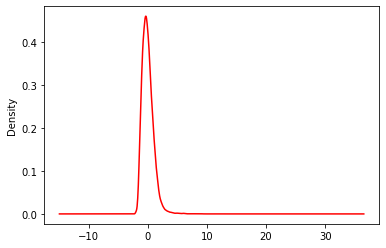

In [64]:
test1.TotalPop.plot(kind='kde',color="red")

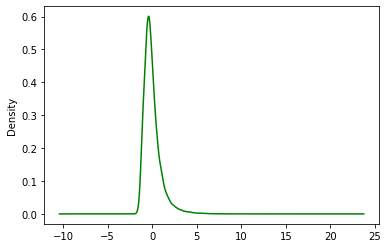

In [65]:
test1.IncomePerCap.plot(kind='kde',color="green")

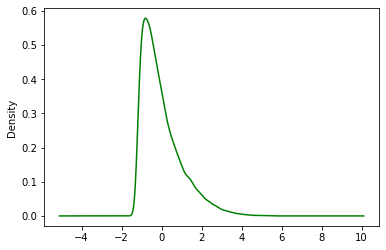

In [66]:
test1.Poverty.plot(kind='kde',color="green")

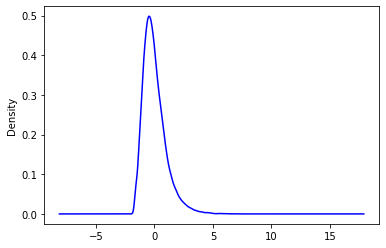

In [67]:
test1.SelfEmployed.plot(kind='kde',color="blue")

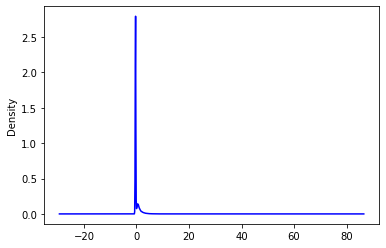

In [68]:
test1.FamilyWork.plot(kind='kde',color="blue")

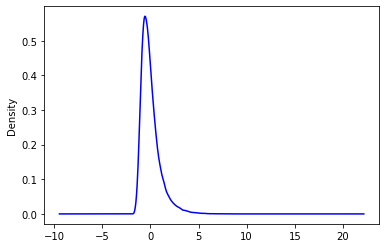

In [69]:
test1.Unemployment.plot(kind='kde',color="blue")

## Hypothesis Testing

In [70]:
print(new['IncomePerCap'].mean())
nullh=new.loc[new["IncomePerCap"]<=new['IncomePerCap'].mean()]

28491.234299286112


In [71]:

print(new['IncomePerCap'].mean())
nullh=new.loc[new["IncomePerCap"]<=new['IncomePerCap'].mean()]

28491.234299286112


In [72]:
set(nullh['County'])

{'Burt',
 'San Miguel',
 'Santa Fe',
 'Gove',
 'Benzie',
 'Westchester',
 'Gentry',
 'Goshen',
 'Caroline',
 'Santa Rosa',
 'Washakie',
 'Ventura',
 'Leavenworth',
 'Braxton',
 'Collier',
 'McClain',
 'Weld',
 'White',
 'Stoddard',
 'Greene',
 'Dunklin',
 'Rockbridge',
 'Cidra',
 'Le Sueur',
 'Dale',
 'Chaffee',
 'Minidoka',
 'Vanderburgh',
 'Bolivar',
 'Fond du Lac',
 'Ashland',
 'Acadia',
 'Frontier',
 'Chattahoochee',
 'Edmonson',
 'Forsyth',
 'Stevens',
 'Humacao',
 'New Madrid',
 'Eagle',
 'Highlands',
 'Summit',
 'Tom Green',
 'Sanilac',
 'Iberia',
 'Reynolds',
 'Toa Alta',
 'Swisher',
 'St. Lucie',
 'Erie',
 'Wilkin',
 'Harris',
 'Mille Lacs',
 'Bureau',
 'Cloud',
 'Upton',
 'Faribault',
 'Keith',
 'San Benito',
 'Camden',
 'Lynn',
 'Cooper',
 'Salt Lake',
 'Cass',
 'Screven',
 'Wichita',
 'Baltimore city',
 'Hampton',
 'New Hanover',
 'Yell',
 'Tift',
 'Santa Clara',
 'Hall',
 'Yukon-Koyukuk Census Area',
 'Ben Hill',
 'Snyder',
 'St. Landry',
 'Early',
 'Sebastian',
 'Chippewa

In [73]:
print("Total number of counties:")
print(len(set(new['County'])))

print("Counties less than the average income per capita:")
print(len(set(nullh['County'])))

Total number of counties:
1928
Counties less than the average income per capita:
1854


In [80]:
new['2413188.6999999997'].mean()

28491.234299286112

In [87]:
nullh['White'].sum().round()

2413189.0

In [94]:
nullh['IncomePerCap'].mean().round()

19920.0

In [88]:
nullh['PoC'].sum().round()

1912460.0

In [74]:
nullhc=nullh.loc[nullh["PoC"]>nullh["White"]]
print("Number of counties where income is lower than average and population of People of colour is greater than that of white")
print(len(set(nullhc['County'])))

Number of counties where income is lower than average and population of People of colour is greater than that of white
874


In [75]:
1/(len(set(nullh['County']))/len(set(nullhc['County'])))

0.47141316073354905

In [76]:
#calling value from the list where the value is of income per capita
print(zscore_a[14].mean())

9.064066680211871e-17


In [91]:
new['IncomePerCap'].mean()

28491.234299286112

In [92]:
new['IncomePerCap'].std()

15047.068660053941

In [77]:
print('''The P value is calculated to be 0.47.Assuming that the significant value is 0.05, we can observe that the P value is greater than the significant value and therefore the alternate hypothesis is rejected.''')
print('')
print('''The null hypothesis which states that the areas with a higher population of people of colour has Income lesser than Average is proven to be true.''')

The P value is calculated to be 0.47.Assuming that the significant value is 0.05, we can observe that the P value is greater than the significant value and therefore the alternate hypothesis is rejected.

The null hypothesis which states that the areas with a higher population of people of colour has Income lesser than Average is proven to be true.


In [78]:
print('''H0>0.05\n 
HA<0.05''')

H0>0.05
 
HA<0.05


In [99]:
def one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value :', actual_z)
    print('hypothesis z value :', hypo_z, '\n')
    if hypo_z >= actual_z:
        return True
    else:
        return False
    
alpha = 0.05
sample_mean = 19920
pop_mean = 28491
sample_size =  1854
std_dev = 15047

print('H0 : μ <=', pop_mean)
print('H1 : μ >', pop_mean)
print('alpha value is :', alpha, '\n')

reject = one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')
#variation with different parameters can be shown here

H0 : μ <= 28491
H1 : μ > 28491
alpha value is : 0.05 

actual z value : 1.6448536269514729
hypothesis z value : -24.52654864939825 

Failed to reject NULL hypothesis
